# __Análisis y muestra de datos__

### Estadísticas a mostrar y gráficos

#### La sección de estadísticas deberá mostrar como mínimo la siguiente información en base a los eventos guardados de todas las partidas:

● Top 10 de palabras que se encuentran primero de todas las partidas.

● Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error, timeout). También debe tener en cuenta las partidas que se terminaron inesperadamente o de forma repentina (partidas sin evento de fin).

● Gráfico que muestre el porcentaje de partidas finalizadas según género.

● Gráfico que muestre el porcentaje de partidas finalizadas según nivel.

● Duración total de la partida (desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).

● Tiempo de la respuesta exitosa más rápida.

● Promedio de tiempo de respuesta para respuestas exitosas.

● Promedio de tiempo de partida general.

● Porcentaje de aciertos por usuarie.

● Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).

● Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.

#### Se podrán agregar opcionalmente:

● Promedio de tiempo de partidas finalizadas por nivel.

### Codigo:
Para comenzar, importamos las tres librerias de las cuales haremos uso: 
● os (para definir el pathing del archivo a analizar).
● pandas (para la lectura y manejo de informacion).
● matplotlib (para la muestra de informacion).
● reduce (para sumar todos los elementos de un iterable)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce

In [38]:
file = os.path.join((os.path.normpath(os.getcwd() + os.sep + os.pardir)), 'files_csv', 'round_analisis.csv')

Ahora tendremos distintas funciones las cuales resolver cada uno de los puntos anteriores. Comenzaremos por:

● Top 10 de palabras que se encuentran primero de todas las partidas.

In [39]:
def obtain_time(top10, value):
    ''''
    Obtains the total time of the games in the three difficulties. We store the time of the event "inicio_partida" in the key: "storage"
    '''
    
    if (value[5] == 'nueva'):
        top10["storage"] = value[0]
    elif (value[5] == 'ok'):
        speed = value[0] - top10["storage"]
        top10[value[6]] = speed
    return top10

def show_top10_words():
    '''
    This function shows the 10 correct words found first in descending order according to how quickly they were found.
    '''
    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')   
    except FileNotFoundError:
        return print('File not found')
    
    top10 = reduce(obtain_time, data_set.values, {})
    print(top10)
    top10.pop("storage")
    sorted_values = sorted(top10.items(), key=lambda x: x[1], reverse=False)
    
    print('Top 10 de palabras encontradas primero (desde la encontrada mas rapida hasta la encontrada mas lenta): ')
    list(map(lambda elem: print(f'{elem[0]+1} - {elem[1][0]} {elem[1][1]}'), enumerate(sorted_values[:10])))

show_top10_words()

{'storage': 1656862419.7607114, 'Merapi(Indonesia)': 0.7370505332946777, 'Sam Smith': 3.434544801712036, 'Cosiguina(Nicaragua)': 33.885794162750244, 'Soufriere Hills(Montserrat)': 10.335142374038696}
Top 10 de palabras encontradas primero (desde la encontrada mas rapida hasta la encontrada mas lenta): 
1 - Merapi(Indonesia) 0.7370505332946777
2 - Sam Smith 3.434544801712036
3 - Soufriere Hills(Montserrat) 10.335142374038696
4 - Cosiguina(Nicaragua) 33.885794162750244


● Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error, timeout). También debe tener en cuenta las partidas que se terminaron inesperadamente o de forma repentina (partidas sin evento de fin)

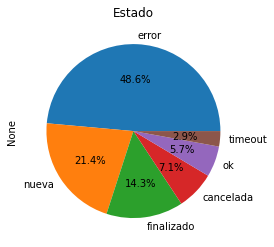

In [40]:
def show_state_piechart():
    '''
    This function shows a pie chart that shows which % of the total rounds of each state (error, new, end, canceled, ok and timeout).
    '''
    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    
    vals = data_set.value_counts('estado')
    vals.plot.pie(y='estado',  title="Estado", autopct='%1.1f%%')

show_state_piechart()

● Gráfico que muestre el porcentaje de partidas finalizadas según género.

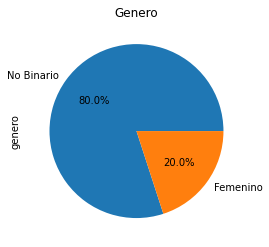

In [41]:
def show_finished_games_gender_piechart():
    '''
    This function shows a pie chart depicting the % of games each gender played over the total ammount of games played.
    '''
    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')    
    
    finalized = data_set[data_set["estado"] == 'finalizado']["genero"]
    vals = finalized.value_counts('genero')
    vals.plot.pie(y='genero',  title="Genero", autopct='%1.1f%%')

show_finished_games_gender_piechart()

● Gráfico que muestre el porcentaje de partidas finalizadas según nivel.

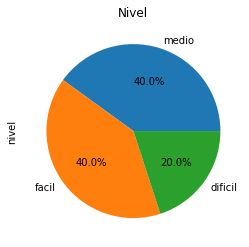

In [42]:
def show_finished_games_level_piechart():
    '''
    This function shows a pie chart depicting the % each difficulty level has over the total ammount of games played.
    '''
    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    
    finalized = data_set[data_set["estado"] == 'finalizado']["nivel"]
    vals = finalized.value_counts('nivel')
    vals.plot.pie(y='Nivel',  title="Nivel", autopct='%1.1f%%')

show_finished_games_level_piechart()

● Duración total de cada partida (desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).

Y

● Promedio de tiempo de partida general.

In [43]:
def obtain_time(list, vals):
    ''''
    Obtains the total time of the game. We store the time of the event "inicio_partida" in the start of the list
    '''
    match vals[1]:
        case 'inicio_partida':
            list[0] = vals[0]
        case 'fin':
            list.append(vals[0] - list[0])
    return list

def show_game_duration():
    '''
    This function shows the duration of each game played and then shows the avarege duration of a game.
    '''
    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found') 
      
    vals = data_set[["timestamp", "evento"]].values
    game_durations = [vals[0]] if vals.any() else ["None"]
    game_durations = reduce(obtain_time, vals, game_durations)
    game_durations.pop(0)
    
    list(map(lambda x: print(f'La partida numero {x[0]+1} duro: {round(x[1], 2)} segundos.'), enumerate(game_durations)))
    print(f'La duracion promedio de una partida es de {sum(game_durations)/len(game_durations):.3} segundos')

show_game_duration()    

La partida numero 1 duro: 4.36 segundos.
La partida numero 2 duro: 4.6 segundos.
La partida numero 3 duro: 4.56 segundos.
La partida numero 4 duro: 5.01 segundos.
La partida numero 5 duro: 4.59 segundos.
La partida numero 6 duro: 4.49 segundos.
La partida numero 7 duro: 4.25 segundos.
La partida numero 8 duro: 4.97 segundos.
La partida numero 9 duro: 6.6 segundos.
La partida numero 10 duro: 138.46 segundos.
La partida numero 11 duro: 15.13 segundos.
La partida numero 12 duro: 32.52 segundos.
La partida numero 13 duro: 5.64 segundos.
La partida numero 14 duro: 8.04 segundos.
La partida numero 15 duro: 20.55 segundos.
La duracion promedio de una partida es de 17.6 segundos


In [44]:
def obtain_speed(list, vals):
    ''''
    Obtains the speed when the user checks a correct answer. We store the time of the event before in the start of the list
    '''
    if (vals[1] == 'ok' or vals[1] == 'inicio_partida'):
        list.append(vals[0] - list[0])
    else:
        list[0] = vals[0]
    return list
    
def show_fastest_and_average_answer():
    '''
    This function is calculates both the avarege time each correct answer takes and the fastest time in which an "ok" answer was given.
    '''

    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    
    vals = data_set[["timestamp", "estado"]].values
    answers_speed = [vals[0]] if vals.any() else ["None"]
    answers_speed = reduce(obtain_speed, vals, answers_speed)
    answers_speed.pop(0)
    
    print(f'La respuesta mas rapida fue dada en: {min(answers_speed):.3} segundos. \nLa velocidad promedio de respuesta es de: {sum(answers_speed)/len(answers_speed):.5} segundos')

show_fastest_and_average_answer()

La respuesta mas rapida fue dada en: 0.737 segundos. 
La velocidad promedio de respuesta es de: 5.593 segundos


● Porcentaje de aciertos por usuarie.

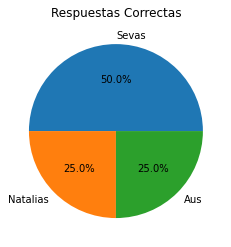

In [45]:
def counts_answers(dicc, elem):
    if (elem[1] == "ok"):
        dicc[elem[0]] += 1
    return dicc

def show_correct_answers():
    '''
    This function shows the % of correct answers each user has over the total number of correct answers. This means that if a user "Juan" has 
    played 10 matches and user "Beto" has only played once, then "Juan" will probably have a much higher % of correct answers, even if overall he 
    has made more mistakes.
    '''

    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    answers = data_set[["usuario", "estado"]].values
    dicc = {key: 0 for key in dict(answers).keys()}
    dicc = reduce(counts_answers, answers, dicc)
    vals = pd.Series(dicc)
    vals.plot.pie(y='usuario',  title="Respuestas Correctas", autopct='%1.1f%%',label="")

show_correct_answers()

● Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).

In [46]:
def counts_timeouts(dicc, elem):
    if (elem[1] == 'timeout'):
        dicc[elem[0]] += 1
    return dicc

def show_timeout_answers():
    '''
    This function works the same way as "show_correct_answers" but shows the timeout answers as a number for each user instead.
    '''

    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    answers = data_set[["usuario", "estado"]].values
    dicc = {key: 0 for key in dict(answers).keys()}
    dicc = reduce(counts_timeouts, answers, dicc)
    list(map(lambda key: print(f'El usuario {key} tuvo un total de: {dicc[key]} timeouts.'), dicc))

show_timeout_answers()

El usuario Sevas tuvo un total de: 2 timeouts.
El usuario Natalias tuvo un total de: 0 timeouts.
El usuario Aus tuvo un total de: 0 timeouts.


● Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.

In [47]:
def counts_errors(dicc, elem):
    if (elem[1] == 'error'):
        dicc[elem[0]] += 1
    return dicc
    
def show_wrong_answers():
    '''
    This function works the same way as "show_correct_answers" but shows the wrong answers as a number for each user instead.
    '''

    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    answers = data_set[["usuario", "estado"]].values
    dicc = {key: 0 for key in dict(answers).keys()}
    dicc = reduce(counts_errors, answers, dicc)
    list(map(lambda key: print(f'El usuario {key} tuvo un total de: {dicc[key]} respuestas erroneas.'), dicc))

show_wrong_answers()

El usuario Sevas tuvo un total de: 21 respuestas erroneas.
El usuario Natalias tuvo un total de: 5 respuestas erroneas.
El usuario Aus tuvo un total de: 8 respuestas erroneas.


● Promedio de tiempo de partidas finalizadas por nivel.

In [48]:
def obtain_time(dicc, vals):
    ''''
    Obtains the total time of the games in the three difficulties. We store the time of the event "inicio_partida" in the key: "storage"
    '''
    match vals[1]:
        case 'inicio_partida':
            dicc["storage"] = vals[0]
        case 'fin':
            dicc[vals[2]].append(vals[0] - dicc["storage"])
    return dicc

def organize(dicc):
    '''
    This functions organizes the dicctionary so that it will first show easy, then medium then hard difficulty.
    '''
    difficulty = dicc.pop('facil')
    dicc.update({'facil': difficulty})
    difficulty = dicc.pop('medio')
    dicc.update({'medio': difficulty})
    difficulty = dicc.pop('dificil')
    dicc.update({'dificil': difficulty})
    return dicc

def show_finished_games_per_level():
    '''
    This function adds the time taken for all finished games of each difficulty level and then shows the avarege time it takes to finish a round
    at each difficulty level.
    '''

    def print_info(key):
        prom = sum(dicc[key]) / len(dicc[key])
        print(f'La dificultad "{key}" tuvo un total de tiempo jugado de: {sum(dicc[key]):.2f} segundos. Y se jugaron {len(dicc[key])} partidas')
        print(f'La dificultad "{key}" tuvo un promedio de tiempo de juego para una partida de: {prom:.3} segundos')

    try:
        data_set = pd.read_csv(file, sep=",", encoding='utf-8', on_bad_lines='skip')
    except FileNotFoundError:
        return print('File not found')
    finished_games = data_set[["timestamp", "evento", "nivel"]].values
    dicc = {key: [] for key in data_set["nivel"].drop_duplicates()}
    dicc = reduce(obtain_time, finished_games, dicc)
    dicc.pop("storage")
    dicc = organize(dicc)
    list(map(print_info, dicc))
    
show_finished_games_per_level()

La dificultad "facil" tuvo un total de tiempo jugado de: 236.53 segundos. Y se jugaron 9 partidas
La dificultad "facil" tuvo un promedio de tiempo de juego para una partida de: 26.3 segundos
La dificultad "medio" tuvo un total de tiempo jugado de: 18.18 segundos. Y se jugaron 4 partidas
La dificultad "medio" tuvo un promedio de tiempo de juego para una partida de: 4.54 segundos
La dificultad "dificil" tuvo un total de tiempo jugado de: 9.06 segundos. Y se jugaron 2 partidas
La dificultad "dificil" tuvo un promedio de tiempo de juego para una partida de: 4.53 segundos


### Fin del analisis y muestra de datos.